### Problem 1A:

#### Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import zscore
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm 
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_sal=pd.read_csv('SalaryData.csv')

In [7]:
df_sal.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [8]:
df_sal.tail()

Education        Occupation  Salary
35   Bachelors   Exec-managerial  173935
36   Bachelors   Exec-managerial  212448
37   Bachelors   Exec-managerial  173664
38   Bachelors   Exec-managerial  212760
39   Doctorate   Exec-managerial  212781

In [9]:
#check shape of dataset
df_sal.shape

(40, 3)

In [10]:
#check missing values 
df_sal.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [11]:
dups=df_sal.duplicated()
print('Number of duplicate rows=%d'%(dups.sum()))

Number of duplicate rows=0


In [12]:
#check info of the dataset
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


### Checking the summary of the dataframe

In [13]:
df_sal.describe(include='all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [14]:
#converting into categorical value
#ANOVA requires its factor/Treatments/independent variables to be categorical
df_sal.Education=pd.Categorical(df_sal.Education)
df_sal.Occupation=pd.Categorical(df_sal.Occupation)

In [15]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


### Checking distinct values of Education and Occupation

In [16]:
df_sal.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [17]:
df_sal.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

### Observation
•	The shape of the dataset  has 40 rows and 3 columns. 
•	The Salary column  is integer data type while Education and Occupation are  Categorical. 
•	We also can see they are no duplicates in the dataset.
•	The entire dataset does not have missing values or null values.	


### 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### Null and the Alternate hypothesis for conducting one-way ANOVA "Education"

* Ho:The Mean Salary for all Education Category is Same(Equal)

* H1:The Mean Salary is Different for Atleast one of the Education Category

### Null and the Alternate hypothesis for conducting one-way ANOVA "Occupation"

* Ho:The Mean Salary for all Occupation Category is Same(Equal)

* H1:The Mean Salary is Different for Atleast one of the Occupation Category

###  1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [18]:
formula='Salary~C(Education)'
model=ols(formula,df_sal).fit()
aov_table=anova_lm(model)
aov_table

df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

* Based on the ANOVA results we get p value < 0.05
* Therefore we Reject Null Hypothesis
* There is Significant difference in the mean salaries for at least one category of education.

### 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [13]:
formula='Salary~C(Occupation)'
model=ols(formula,df_sal).fit()
aov_table=anova_lm(model)
aov_table

df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

* Based on the ANOVA results we get p value > 0.05
* Therefore we fail to reject the Null Hypothesis
* There is No significant difference in Salary due to different Occupation Category

### 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [19]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [20]:
compare=MultiComparison(df_sal['Salary'],df_sal['Education'])
result=compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


* The table shows that since the p- values (p-adj in the table) are lesser than the significance level for all the three categories of education, this implies that the mean salaries across all categories of education are different.

### 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib notebook

In [87]:
df_sal['Education']=df_sal['Education'].astype(str)
df_sal['Occupation']=df_sal['Occupation'].astype(str)

<IPython.core.display.Javascript object>


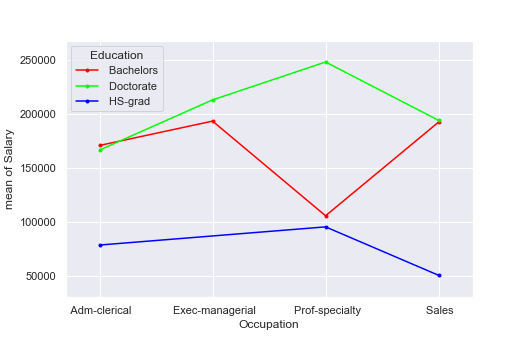

In [90]:
interaction_plot(df_sal['Occupation'],df_sal['Education'],df_sal['Salary'])
plt.show()


* The interaction plot shows that there is significant amount of interaction between the categorical variables, Education and Occupation.
### The following are some of the observations from the interaction plot:
* People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.
* People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging from value 170000–190000).
* People with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupations as Adm-clerical and Sales.
* People with education as Bachelors and occupation Sales earn higher than people with education as Bachelors and occupation Prof-Specialty whereas people with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty. We see a reversal in this part of the plot.
* Similarly, people with education as Bachelors and occupation as Prof-Specialty earn lesser than people with education as Bachelors and occupation Exec-Managerial whereas people with education as Doctorate and occupation as Prof-Specialty earn higher than people with education as Doctorate and occupation Exec-Managerial. There is a reversal in this part of the plot too.
* Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.
* Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate.
* Prof-Specialty people with education as Doctorate earn maximum salaries and people with education as HS-Grad earn the minimum.
* People with education as HS -Grad earn the minimum salaries.
* There are no people with education as HS -grad who hold Exec-managerial occupation.
* People with education as Bachelors and with occupation as Sales and Exec-Managerial earn the same salaries.

### 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

### Null and alternative hypotheses
* Ho:There is no interaction effect between the 2 independent variables, education and occupation
* H1:There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.

In [19]:
formula= 'Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model=ols(formula,df_sal).fit()
aov_table=anova_lm(model)
aov_table

df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN

#### we see that there is a significant amount of interaction between the variables, Education and Occupation.
(p value=2.232500e-05) < 0.05
Therefore,we reject the null hypothesis
* There is an interaction effect between education and occupation on the mean salary
* From the ANOVA method and the interaction plot, we can see that education combined with occupation results in higher and better salaries among the people.
* It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.

### 1.7 Explain the business implications of performing ANOVA for this particular case study.

ANOVA technique is part of domain called “Experimental Designs”
It helps in establishing in an exact way, the Cause- Effect relation between variables
Salary is hypothesized to depend on educational qualification and occupation.
After Performing ANOVA for this particular case study following business implications can be made:
* There is an interaction effect between education and occupation on the mean salary for different given categories.
* People with education as Doctrate earns the maximum salaries.
* People with education as HS-grad earn the least
* People with education as Bachelors or Doctorate and occupation as Adm-clerical and Sales almost earn the same salaries(salaries ranging in between 170000–190000).
* People with HS-grad education do not reach the position of Exec-managerial and they hold only Adm-clerk, Sales and Prof-Specialty occupations.
* People with education as Bachelors and occupation Sales earn higher than people with education as Bachelors and occupation Prof-Specialty whereas people with education as Doctorate and occupation Sales earn lesser than people with Doctorate and occupation Prof-Specialty
* There are no people with education as HS -grad who hold Exec-managerial occupation
* Salespeople with Bachelors or Doctorate education earn the same salaries and earn higher than people with education as HS-grad.
* People with education as Bachelors and with occupation as Sales and Exec-Managerial earn the same salaries.
* Adm clerical people with education as HS-grad earn the lowest salaries when compared to people with education as Bachelors or Doctorate.
* From the ANOVA method and the interaction plot, we can see that 'Education' combined with 'Occupation' results in higher and better salaries among the people


## Problem 2:

### The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [2]:
df=pd.read_csv("Education+-+Post+12th+Standard.csv")

In [3]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [4]:
df.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

### Data Dictionary

* 1) Names: Names of various university and colleges
* 2) Apps: Number of applications received
* 3) Accept: Number of applications accepted
* 4) Enroll: Number of new students enrolled
* 5) Top10perc: Percentage of new students from top 10% of Higher Secondary class
* 6) Top25perc: Percentage of new students from top 25% of Higher Secondary class
* 7) F.Undergrad: Number of full-time undergraduate students
* 8) P.Undergrad: Number of part-time undergraduate students
* 9) Outstate: Number of students for whom the particular college or university is Out-of-state tuition
* 10) Room.Board: Cost of Room and board
* 11 Books: Estimated book costs for a student
* 12) Personal: Estimated personal spending for a student
* 13) PhD: Percentage of faculties with Ph.D.’s
* 14) Terminal: Percentage of faculties with terminal degree
* 15) S.F.Ratio: Student/faculty ratio
* 16) perc.alumni: Percentage of alumni who donate
* 17) Expend: The Instructional expenditure per student
* 18) Grad.Rate: Graduation rate


In [23]:
df.shape

(777, 18)

In [24]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [25]:
#check missing values
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

### Checking for Duplicates

In [26]:
dups=df.duplicated()
print('Number of duplicate rows=%d'%(dups.sum()))

Number of duplicate rows=0


In [27]:
#data summary
df.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

#### Observations:
* Data consists of 777 different collges with 18 features
* We have only 1 categorical field as "Names" and rest being numerical field
* All the columns seems to be integer or float values except "Names" which is an object datatype  
* There are no duplicates in the dataset. 
* The dataset does not have missing values or null values

### 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

####  Univariate Analysis
Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [4]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

### APPS

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


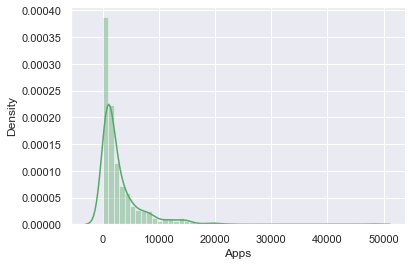

BoxPlot of Apps
----------------------------------------------------------------------------


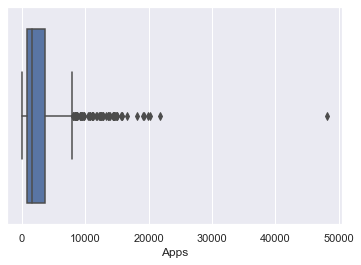

In [10]:
univariateAnalysis_numeric('Apps',20)

- The Box plot of Apps variable shows that dataset has too many outliers 
* the distribution of the data is right skewed. The max applications for a college is 48094.  

### ACCEPT

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 

<IPython.core.display.Javascript object>


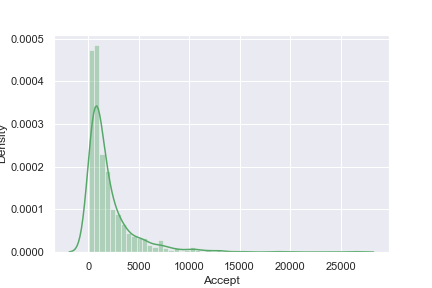

Distribution of Accept
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


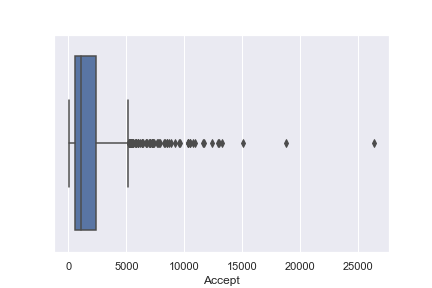

BoxPlot of Accept
----------------------------------------------------------------------------


In [33]:
univariateAnalysis_numeric('Accept',20)

* The Box plot of ACCEPT variable shows that dataset has too many outliers; 
* The distribution of the data is highly right skewed. 
* The average number of applications accepted is 2018.80 with minimum Acceptance being 72 and maximum being 26330


### ENROLL

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 

<IPython.core.display.Javascript object>


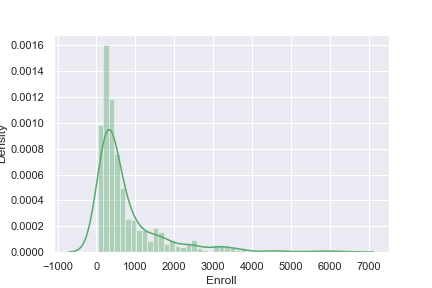

Distribution of Enroll
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


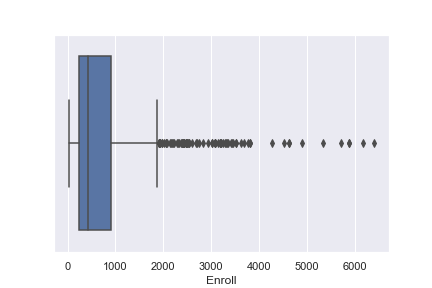

BoxPlot of Enroll
----------------------------------------------------------------------------


In [34]:
univariateAnalysis_numeric('Enroll',20)

* The box plot of the Enroll variable also has many outliers. 
* The distribution of the data is Right skewed. 
* From the distplot we can understand majority of the colleges have enrolled students in the range of approximately 200 to 500 students, with the mean being 779 number of new students enrolled.

### Top10perc

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 

<IPython.core.display.Javascript object>


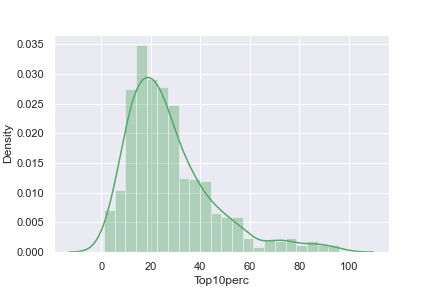

Distribution of Top10perc
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


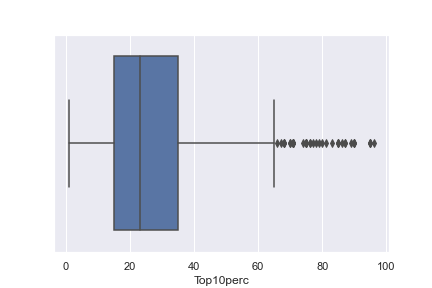

BoxPlot of Top10perc
----------------------------------------------------------------------------


In [35]:
univariateAnalysis_numeric('Top10perc',20)

Top10perc: Percentage of new students from top 10% of Higher Secondary class

* The box plot of the students from top 10 percentage of higher secondary class seems to have many outliers. 
* The distribution seems to be positively skewed.
* Percentage of new students from top 10% of Higher Secondary class has good amount of intake


### Top25perc

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 

<IPython.core.display.Javascript object>


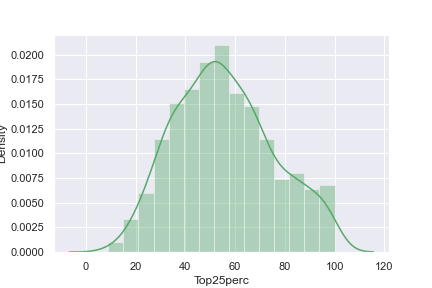

Distribution of Top25perc
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


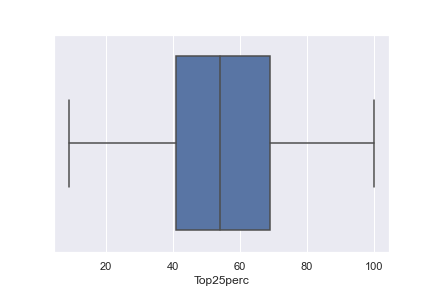

BoxPlot of Top25perc
----------------------------------------------------------------------------


In [36]:
univariateAnalysis_numeric('Top25perc',20)

Top25perc: Percentage of new students from top 25% of Higher Secondary class
* The box plot for the top 25% has no outliers.
* The distribution is almost Near Normal with fair bit of approximation.
* The distribution does appear to be symmetric.


### F.Undergrad

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 

<IPython.core.display.Javascript object>


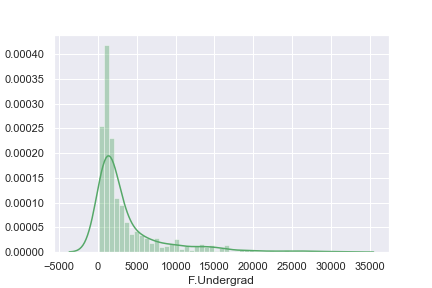

Distribution of F.Undergrad
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


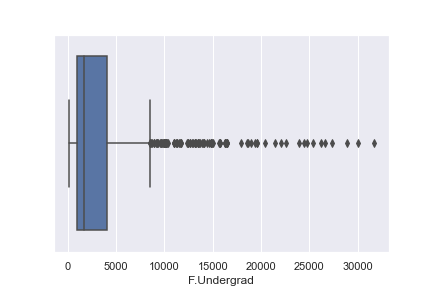

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


In [37]:
univariateAnalysis_numeric('F.Undergrad',20)

* The box plot of the full time graduates has many outliers. 
* The distribution of the data is highly right skewed. 
* There are high number of full time graduates studying in all the university in the range of approximately 3000 to 5000 as observed from the data distribution


### Outstate

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 

<IPython.core.display.Javascript object>


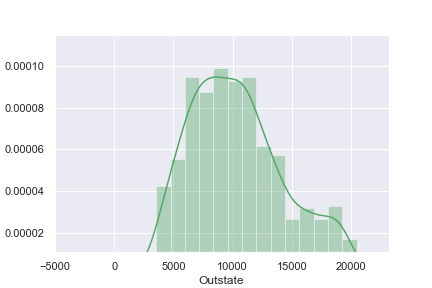

Distribution of Outstate
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


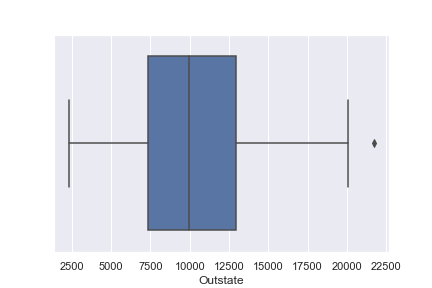

BoxPlot of Outstate
----------------------------------------------------------------------------


In [77]:
univariateAnalysis_numeric('Outstate',20)

* The box plot of the Outstate has only one outliers. 
* The distribution of the data is somewhere close to normal but not exactly normally distributed and has little positive skewness associated with it.


### P.Undergrad

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 

<IPython.core.display.Javascript object>


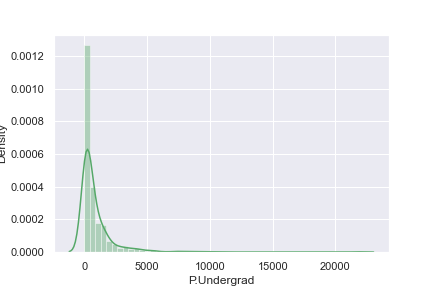

Distribution of P.Undergrad
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


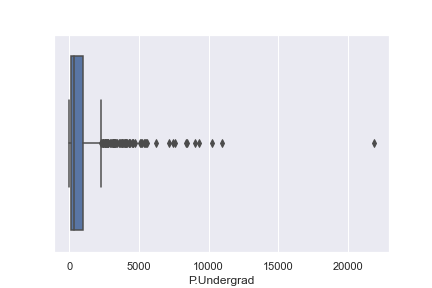

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


In [39]:
univariateAnalysis_numeric('P.Undergrad',20)

* The box plot of the part time graduates has many outliers. 
* The distribution of the data is highly right skewed. 
* On an average 855 students are part-time graduates studying in all the university.


### Books

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 

<IPython.core.display.Javascript object>


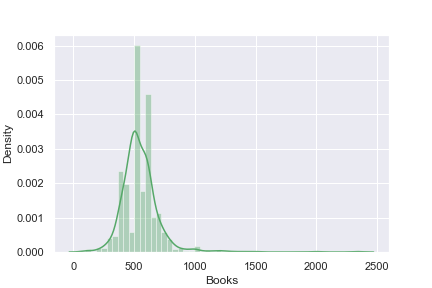

Distribution of Books
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


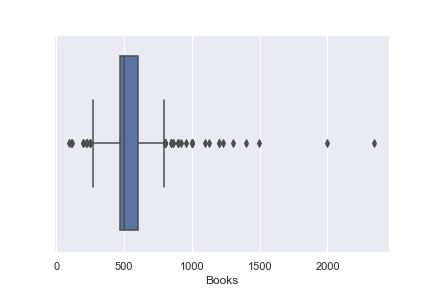

BoxPlot of Books
----------------------------------------------------------------------------


In [78]:
univariateAnalysis_numeric('Books',20)

* The box plot of books has many outliers.
* The distribution seems to be bimodal (2 peaks). 
* The cost of books for a student has an average cost of 549.38


### Personal

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 

<IPython.core.display.Javascript object>


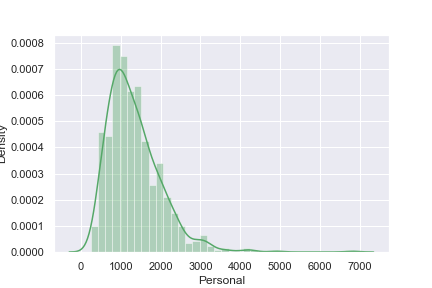

Distribution of Personal
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


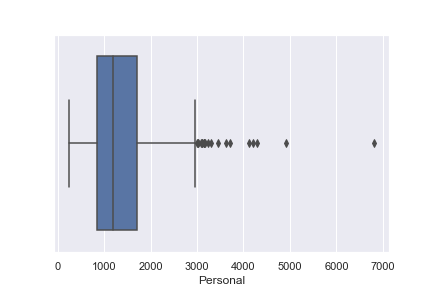

BoxPlot of Personal
----------------------------------------------------------------------------


In [79]:
univariateAnalysis_numeric('Personal',20)

* The box plot of personal expense has many outliers. 
* Some student’s personal expense are much higher than the rest of the students.
* The distribution appears to be positively skewed.


### PhD

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 

<IPython.core.display.Javascript object>


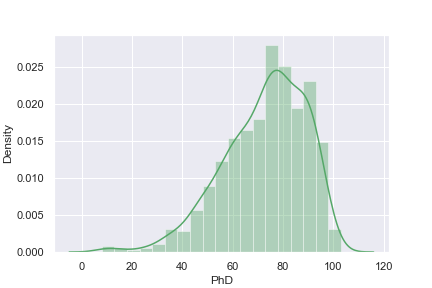

Distribution of PhD
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


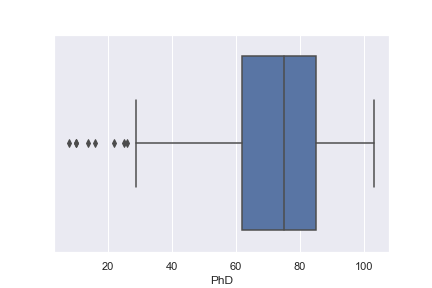

BoxPlot of PhD
----------------------------------------------------------------------------


In [42]:
univariateAnalysis_numeric('PhD',20)

* The box plot of variable PhD has many outliers on the lower range [Q1-(1.5*IQR)]. 
* The distribution seems to be negatively or left skewed.


### Terminal

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 

<IPython.core.display.Javascript object>


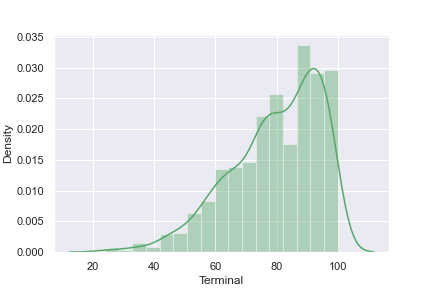

Distribution of Terminal
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


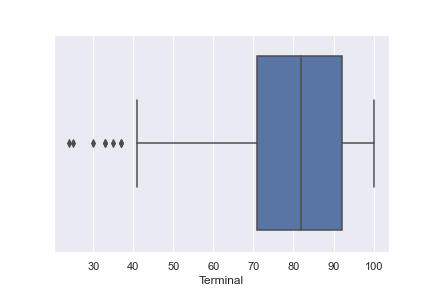

BoxPlot of Terminal
----------------------------------------------------------------------------


In [80]:
univariateAnalysis_numeric('Terminal',20)

* The box plot of terminal seems to have outliers in the dataset on the lower range [Q1-(1.5*IQR)].
* The distribution for the terminal also appears to be negatively skewed.

### S.F.Ratio

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 

<IPython.core.display.Javascript object>


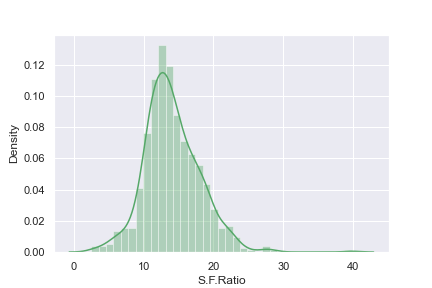

Distribution of S.F.Ratio
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


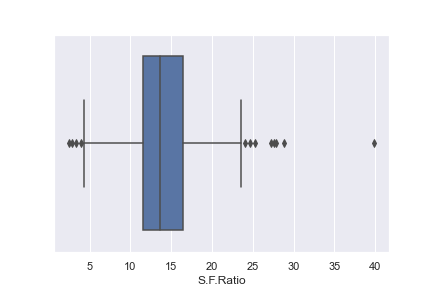

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


In [44]:
univariateAnalysis_numeric('S.F.Ratio',20)

* The SF ratio variable also has outliers in the dataset.

* The distribution is almost Near Normal with fair bit of approximation.

* Most of the colleges have SF Ratio in the range of 10 to 20



### perc.alumni

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 

<IPython.core.display.Javascript object>


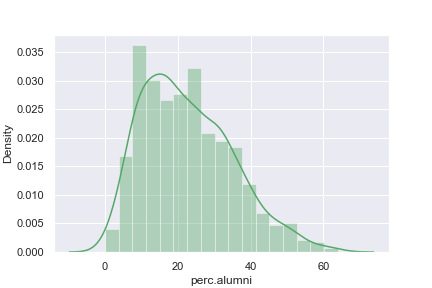

Distribution of perc.alumni
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


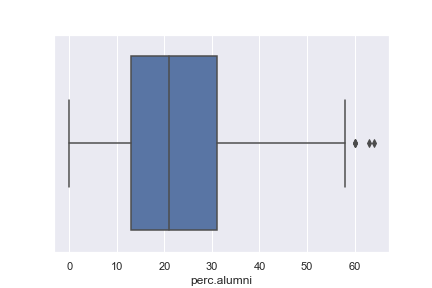

BoxPlot of perc.alumni
----------------------------------------------------------------------------


In [81]:
univariateAnalysis_numeric('perc.alumni',20)

* The percentage of alumni box plot have some outliers in the dataset.

* The distribution is almost Near Normal with fair bit of approximation.

* There are also some colleges where the Percentage of alumni who donate is zero.


### Expend

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 

<IPython.core.display.Javascript object>


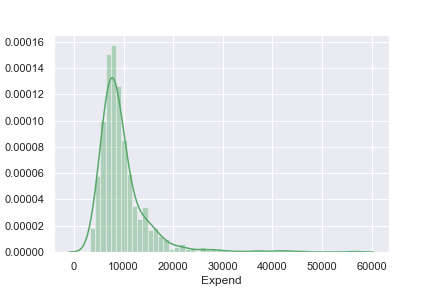

Distribution of Expend
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


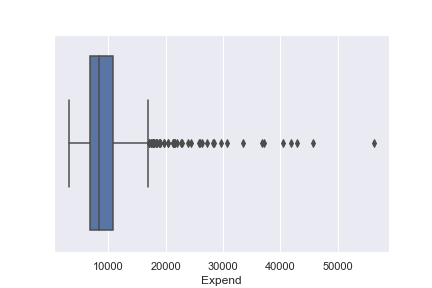

BoxPlot of Expend
----------------------------------------------------------------------------


In [82]:
univariateAnalysis_numeric('Expend',20)

* The expend variable also has many outliers in the dataset. 

* The distribution of the expenditure is highly right skewed.


### Grad.Rate

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 

<IPython.core.display.Javascript object>


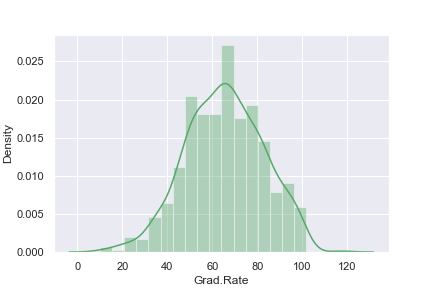

Distribution of Grad.Rate
----------------------------------------------------------------------------


<IPython.core.display.Javascript object>


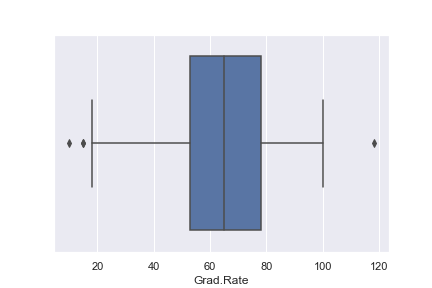

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


In [47]:
univariateAnalysis_numeric('Grad.Rate',20)

* The box plot for the graduation rate shows presence of outliers in the dataset. 

* The distribution is almost Near Normal with fair bit of approximation

* Most of  the colleges have Grad.Rate in the range of 45 to 90, with a mean Grad.Rate of 65.46


Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


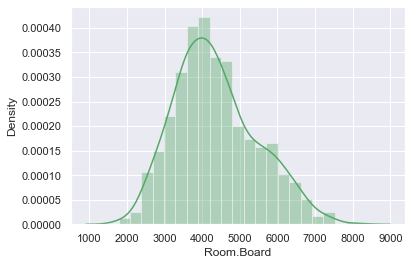

BoxPlot of Room.Board
----------------------------------------------------------------------------


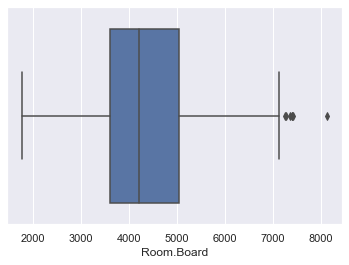

In [5]:
univariateAnalysis_numeric('Room.Board',20)

* The Room Board variable has some outliers present in the data
* The Distribution is slightly right skewed.
* The Room Board Cost for roughly falls in the range of 3000 to 6000 for students of all the colleges,with mean of 4357.52

### Multivariate Analysis

<IPython.core.display.Javascript object>


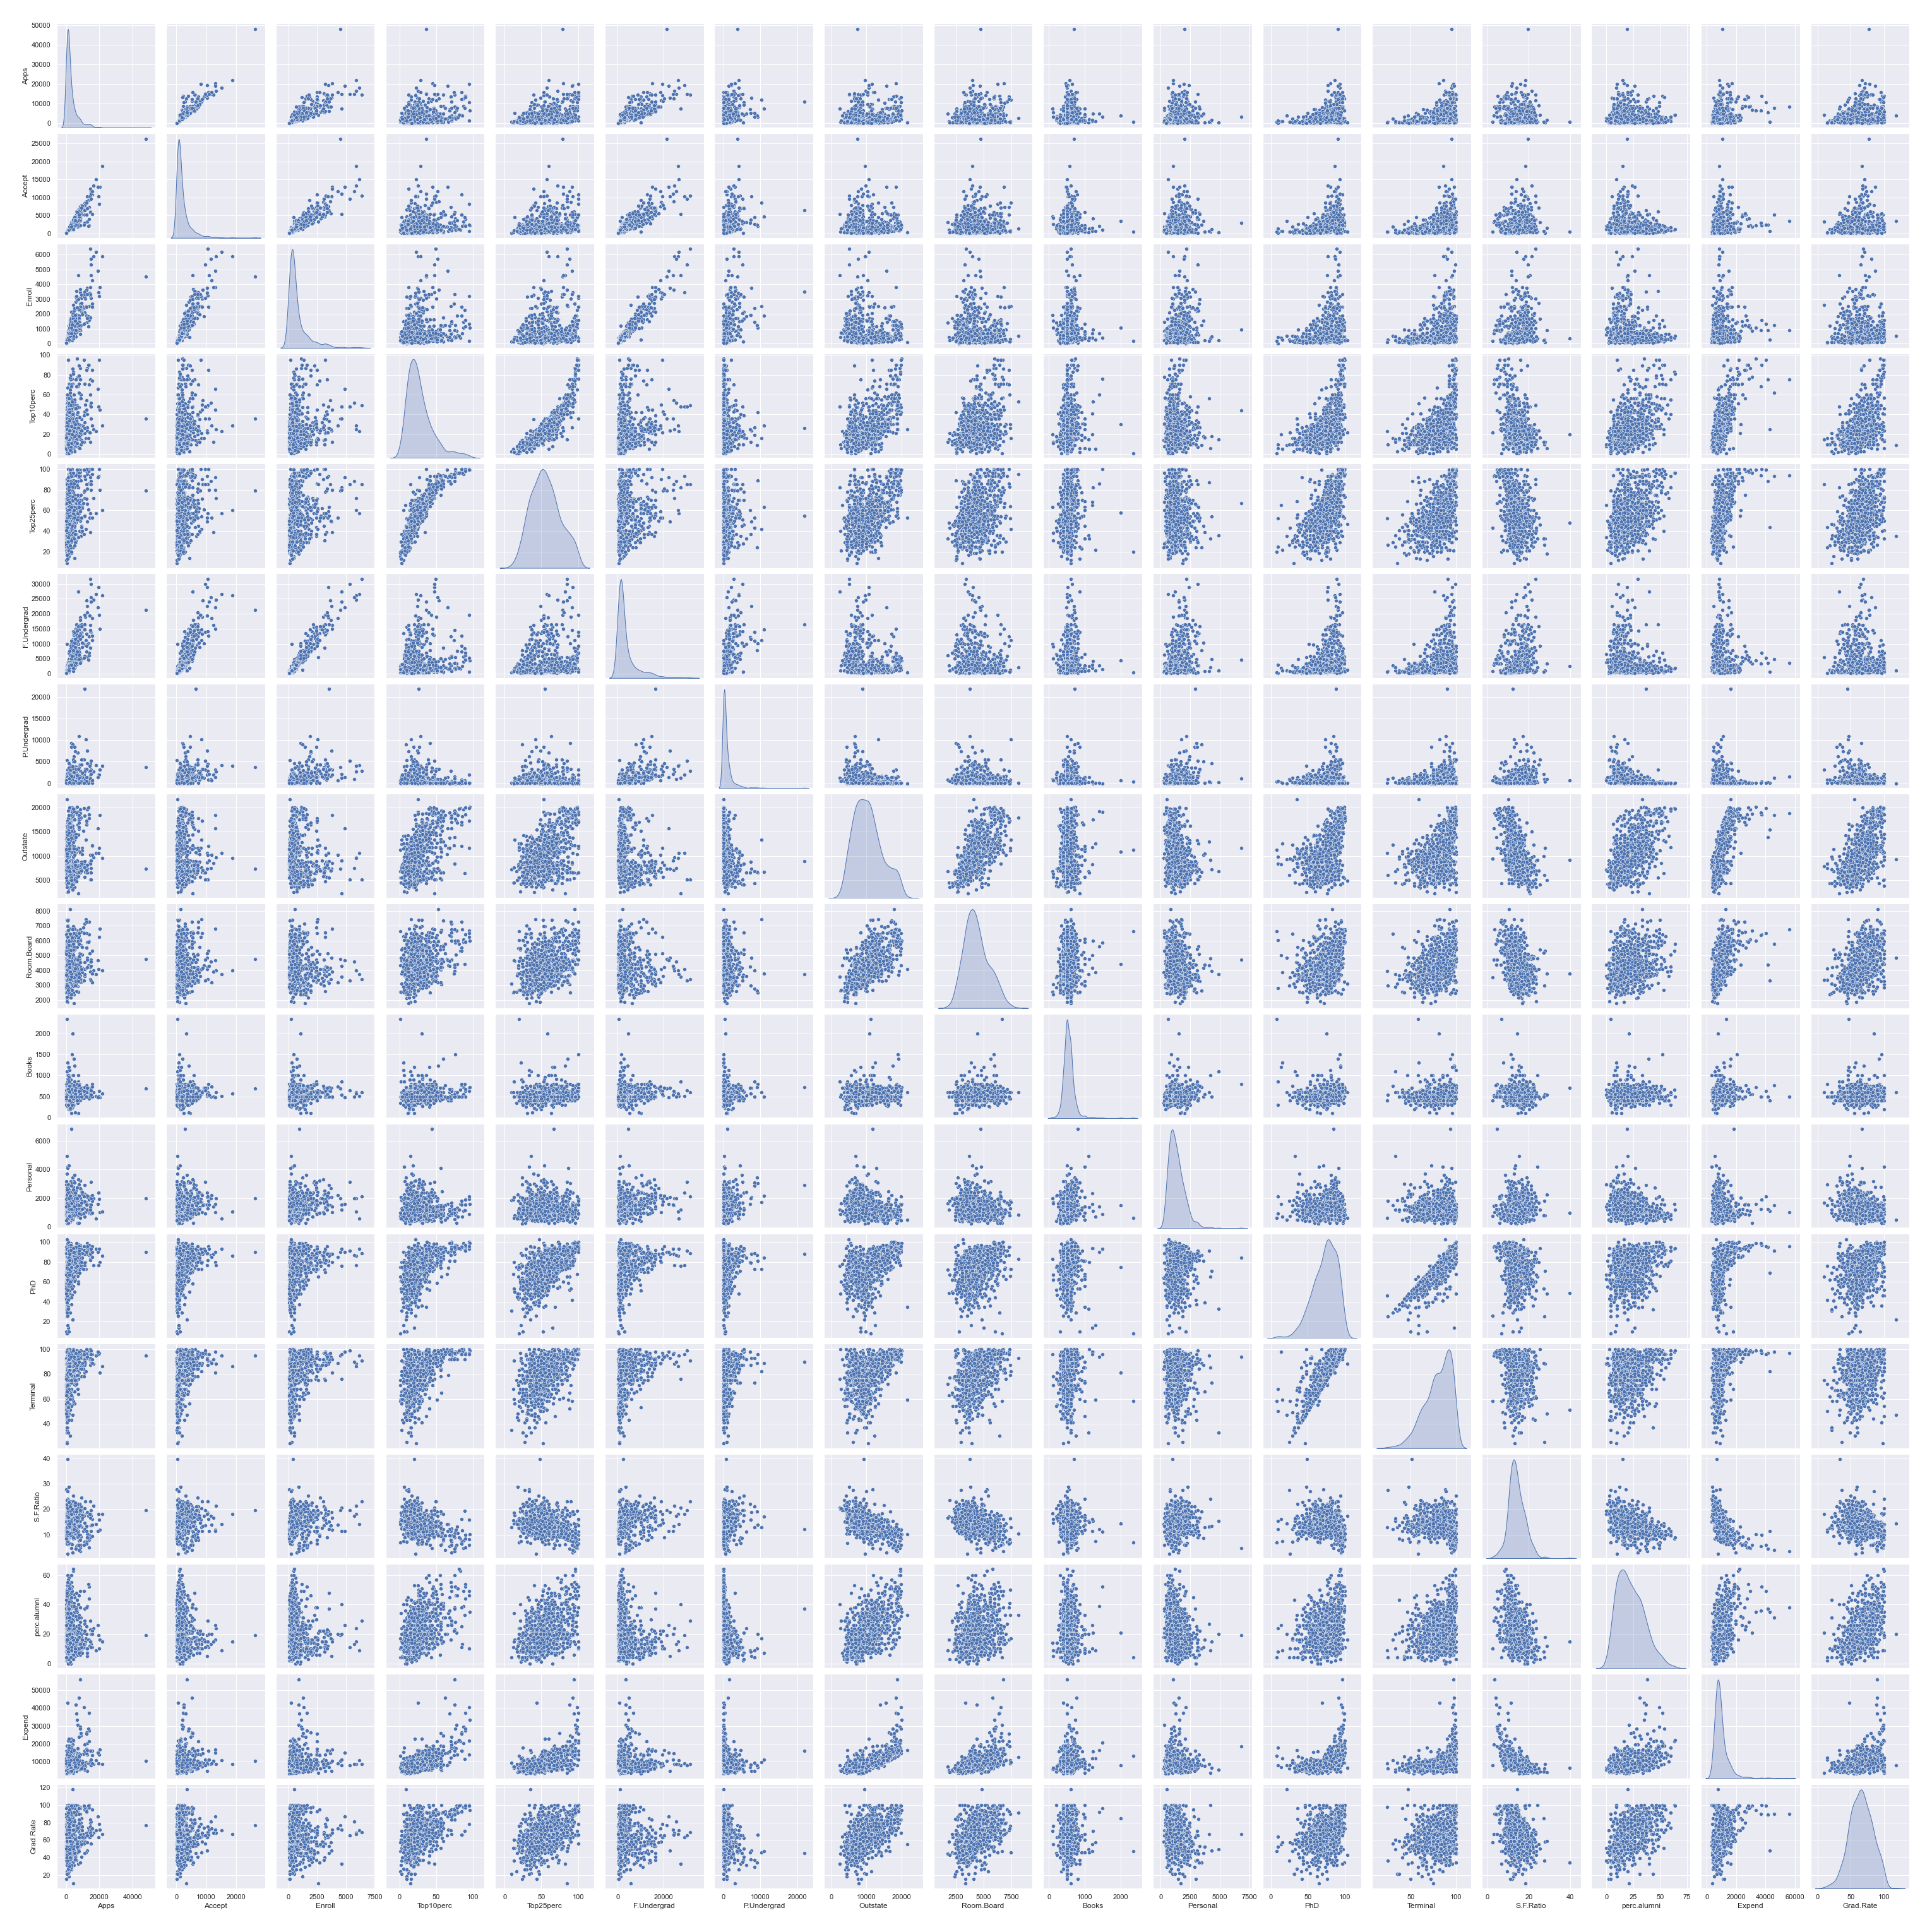

In [48]:
sns.pairplot(df,palette='Set2',diag_kind='kde')

* The pair plot helps us to understand the relationship between all the numerical values in the data
* On comparing all the variables with each other, we could understand the patterns or trends in the dataset .
* Heatmap correlations represents the multivariate plots with a positive or a negative value in  accordance  with their relationship with the respective variables.


In [49]:
dfcorr=df.corr()
dfcorr

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<IPython.core.display.Javascript object>


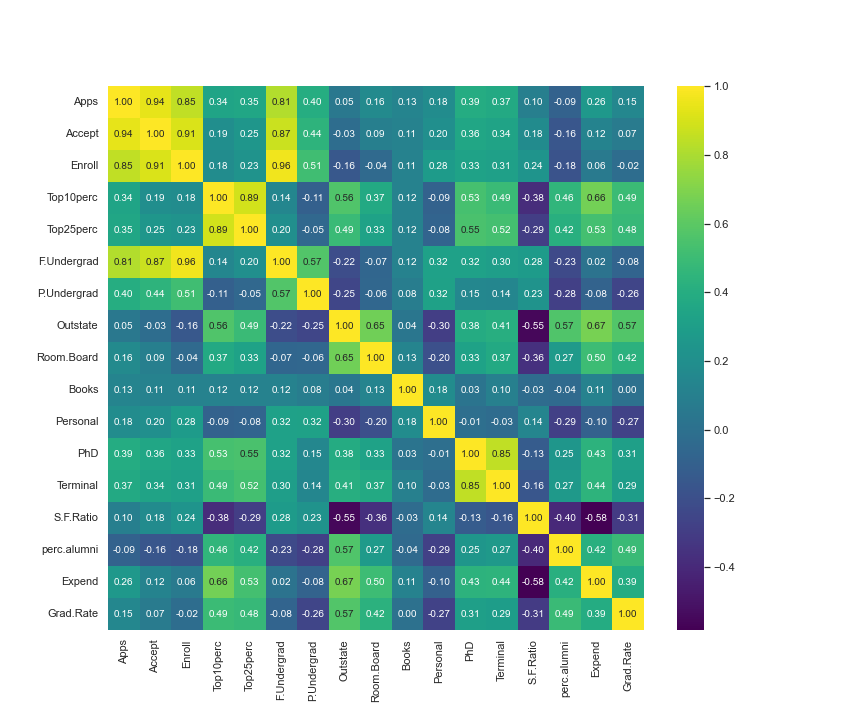

<AxesSubplot:>

In [83]:
#Check for presence of correlations
plt.figure(figsize = (12,10))
sns.heatmap(dfcorr,cmap='viridis',annot=True,fmt='.2f')

* This Heat map gives us the correlation between two numerical values. 
* The varying intensity of colour represents the measure of correlation. Correlation is a measure of linear relationship between two variables. 
* Correlation ranges from -1 to +1. Values closer to zero means lesser correlation and those near to -1  represent high negative correlation while those with +1 represent high positive correlation.



#### Correlation of Apps
* Apps and Accept = 0.94
* Apps and Enroll = 0.85
* Apps and F.Undergrad =0.81
We can observe that the application variable is highly positively correlated with application accepted, students enrolled and full time graduates. So this relationship gives the insights on when student submits the application it is accepted and the student is enrolled as fulltime graduate

#### Correlation of Accept
* Accept and Enroll = 0.94
* Accept and F.Undergrad = 0.87
We can observe that the Accept (Number of applications accepted) variable is highly positively correlated with number of new students enrolled and number of full-time undergraduate students

#### Correlation of Enroll
* Enroll and F.Undergrad = 0.96
We can observe that number of new students enrolled variable is highly positively correlated with Number of full-time undergraduate students, so we can infer that most of the new students enrolled are full time undergraduate students.

#### Correlation of Top10Perc
* Top10perc and Top25Perc = 0.89
Both Top10Perc and Top25Perc are highly positively correlated, as those in top25perc will already consist of top10Perc.

#### Correlation of PhD
* PhD and Terminal = 0.85
We can observe that the PhD (Percentage of faculties with Ph.D.’s) variable is highly positively correlated with Terminal (Percentage of faculties with terminal degree)


#### Correlation of Outstate
* Outstate and Room board = 0.65
* Outstate and Expend = 0.67
* Outstate and SF Ratio = -0.55
The Variable Outstate (Number of students for whom the particular college or university is Out-of-state tuition) is highly positively correlated with Room board (Cost of Room and board) and Expend (The Instructional expenditure per student) while it has a negative correlation with S.F Ratio (Student/faculty ratio).
Cost of Room Boarding as well as expenditure is higher for the students who are stay out of state.
There is lower student to faculty ration for outstate students.


#### Correlation of SF Ratio
* S.F Ratio and Expend = -0.58
We can find negative correlation between variable S.F Ratio and variable Expend.
That is higher the S.F Ratio lower will be the Expend Variable


### 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling

Yes,Scaling is necessary for PCA in this case because of the following reasons:
* Dataset has features with different "Weights"
* The machine learning algorithm works on numbers and does not know what that number represents,for example in our
dataset "Accept: Number of applications accepted" and "Personal: Estimated personal spending for a student" represents completely two different things.
* But since Accept>Personal (weight/value wise) Algorithm makes the assumption that "Accept" is more important than "Personal" and Accept feature starts dominating the algorithm.
* In distance based algorithms it is recommended to Scale the features so that all features are in "same scale"

In [5]:
df_num=df.select_dtypes(include=['float64','int64'])

In [6]:
df_num.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [7]:
#using Z score for scaling
df_scaled=df_num.apply(zscore)
df_scaled.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

### 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [8]:
cov_matrix=df_scaled.cov()
cov_matrix

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.944666  0.847913   0.339270   0.352093     0.815540   
Accept       0.944666  1.001289  0.912811   0.192695   0.247795     0.875350   
Enroll       0.847913  0.912811  1.001289   0.181527   0.227037     0.965883   
Top10perc    0.339270  0.192695  0.181527   1.001289   0.893144     0.141471   
Top25perc    0.352093  0.247795  0.227037   0.893144   1.001289     0.199702   
F.Undergrad  0.815540  0.875350  0.965883   0.141471   0.199702     1.001289   
P.Undergrad  0.398777  0.441839  0.513730  -0.105492  -0.053646     0.571247   
Outstate     0.050224 -0.025788 -0.155678   0.563055   0.490024    -0.216020   
Room.Board   0.165152  0.091016 -0.040284   0.371959   0.331917    -0.068979   
Books        0.132729  0.113672  0.112856   0.119012   0.115676     0.115699   
Personal     0.178961  0.201248  0.281291  -0.093437  -0.080914     0.317608   
PhD          0.391201  0.356216  0.331896   0.532513   0.546566     0.318747   
Terminal     0.369968  0.338018  0.308671   0.491768   0.525425     0.300406   
S.F.Ratio    0.095756  0.176456  0.237577  -0.385370  -0.295009     0.280064   
perc.alumni -0.090342 -0.160196 -0.181027   0.456072   0.418403    -0.229758   
Expend       0.259927  0.124878  0.064252   0.661765   0.528127     0.018676   
Grad.Rate    0.146944  0.067399 -0.022370   0.495627   0.477896    -0.078875   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398777  0.050224    0.165152  0.132729  0.178961  0.391201   
Accept          0.441839 -0.025788    0.091016  0.113672  0.201248  0.356216   
Enroll          0.513730 -0.155678   -0.040284  0.112856  0.281291  0.331896   
Top10perc      -0.105492  0.563055    0.371959  0.119012 -0.093437  0.532513   
Top25perc      -0.053646  0.490024    0.331917  0.115676 -0.080914  0.546566   
F.Undergrad     0.571247 -0.216020   -0.068979  0.115699  0.317608  0.318747   
P.Undergrad     1.001289 -0.253839   -0.061405  0.081304  0.320294  0.149306   
Outstate       -0.253839  1.001289    0.655100  0.038905 -0.299472  0.383476   
Room.Board     -0.061405  0.655100    1.001289  0.128128 -0.199685  0.329627   
Books           0.081304  0.038905    0.128128  1.001289  0.179526  0.026940   
Personal        0.320294 -0.299472   -0.199685  0.179526  1.001289 -0.010950   
PhD             0.149306  0.383476    0.329627  0.026940 -0.010950  1.001289   
Terminal        0.142086  0.408509    0.375022  0.100084 -0.030653  0.850682   
S.F.Ratio       0.232830 -0.555536   -0.363095 -0.031970  0.136521 -0.130698   
perc.alumni    -0.281154  0.566992    0.272714 -0.040260 -0.286337  0.249330   
Expend         -0.083676  0.673646    0.502386  0.112554 -0.098018  0.433319   
Grad.Rate      -0.257332  0.572026    0.425489  0.001062 -0.269691  0.305431   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369968   0.095756    -0.090342  0.259927   0.146944  
Accept       0.338018   0.176456    -0.160196  0.124878   0.067399  
Enroll       0.308671   0.237577    -0.181027  0.064252  -0.022370  
Top10perc    0.491768  -0.385370     0.456072  0.661765   0.495627  
Top25perc    0.525425  -0.295009     0.418403  0.528127   0.477896  
F.Undergrad  0.300406   0.280064    -0.229758  0.018676  -0.078875  
P.Undergrad  0.142086   0.232830    -0.281154 -0.083676  -0.257332  
Outstate     0.408509  -0.555536     0.566992  0.673646   0.572026  
Room.Board   0.375022  -0.363095     0.272714  0.502386   0.425489  
Books        0.100084  -0.031970    -0.040260  0.112554   0.001062  
Personal    -0.030653   0.136521    -0.286337 -0.098018  -0.269691  
PhD          0.850682  -0.130698     0.249330  0.433319   0.305431  
Terminal     1.001289  -0.160310     0.267475  0.439365   0.289900  
S.F.Ratio   -0.160310   1.001289    -0.403448 -0.584584  -0.307106  
perc.alumni  0.267475  -0.403448     1.001289  0.418250   0.491530  
Expend       0.439365  -0.58458

In [9]:
corr_matrix=df_scaled.corr()
corr_matrix

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

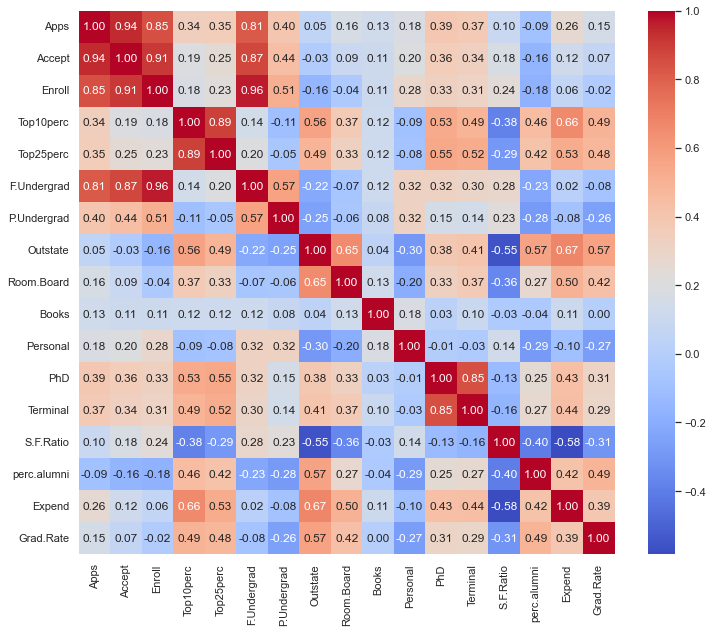

In [10]:
plt.figure(figsize = (12,10))
sns.heatmap(df_scaled.corr(),cmap='coolwarm',annot=True,fmt='.2f')

* The comparison between the covariance and correlation matrix is that both of the terms measures the relationship and the dependency between two variables.  
* Scaling in general is used to normalize the range of independent variables or features of data. We are bringing the dataset into one unit or similar scale as the features have different weights.
* Covariance Matrix is a mathematical representation of total variance of individual dimension and across dimension.(it is a pairplot in number form)
* Also called as a Square and a Symmetric Matrix.
* Covariance indicates the direction of the linear relationship between the variables whether it is positive or negative. By direction means, it is directly proportional or inversely proportional. 
* Covariance is a measure of how much two random variables vary together( to what extent, they change together)
* Correlation on the other hand measures both the strength and direction of the linear relationship between two variables (Correlation describes the strength of an association between two variables )
* We can see from correlation matrix that application, acceptance, enrol and fulltime graduates are highly positively correlated .Also the top 10 percentage and top 25 percentage are highly positively correlated.
* The Diagonal of Correlation Matrix has a value of one.
 


### 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

* Before Scaling

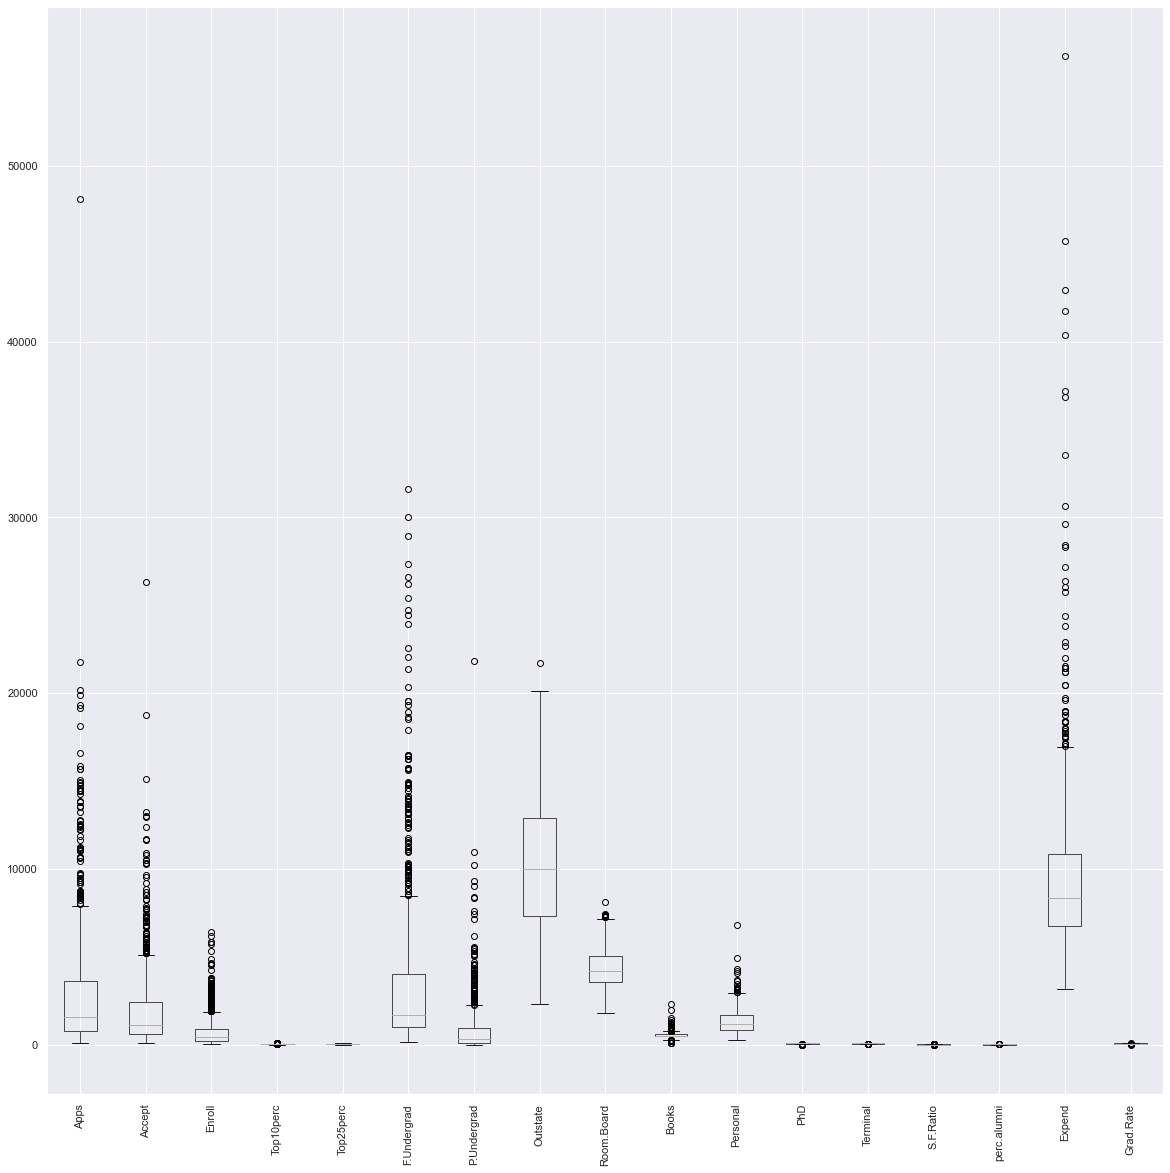

In [9]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

* After Scaling

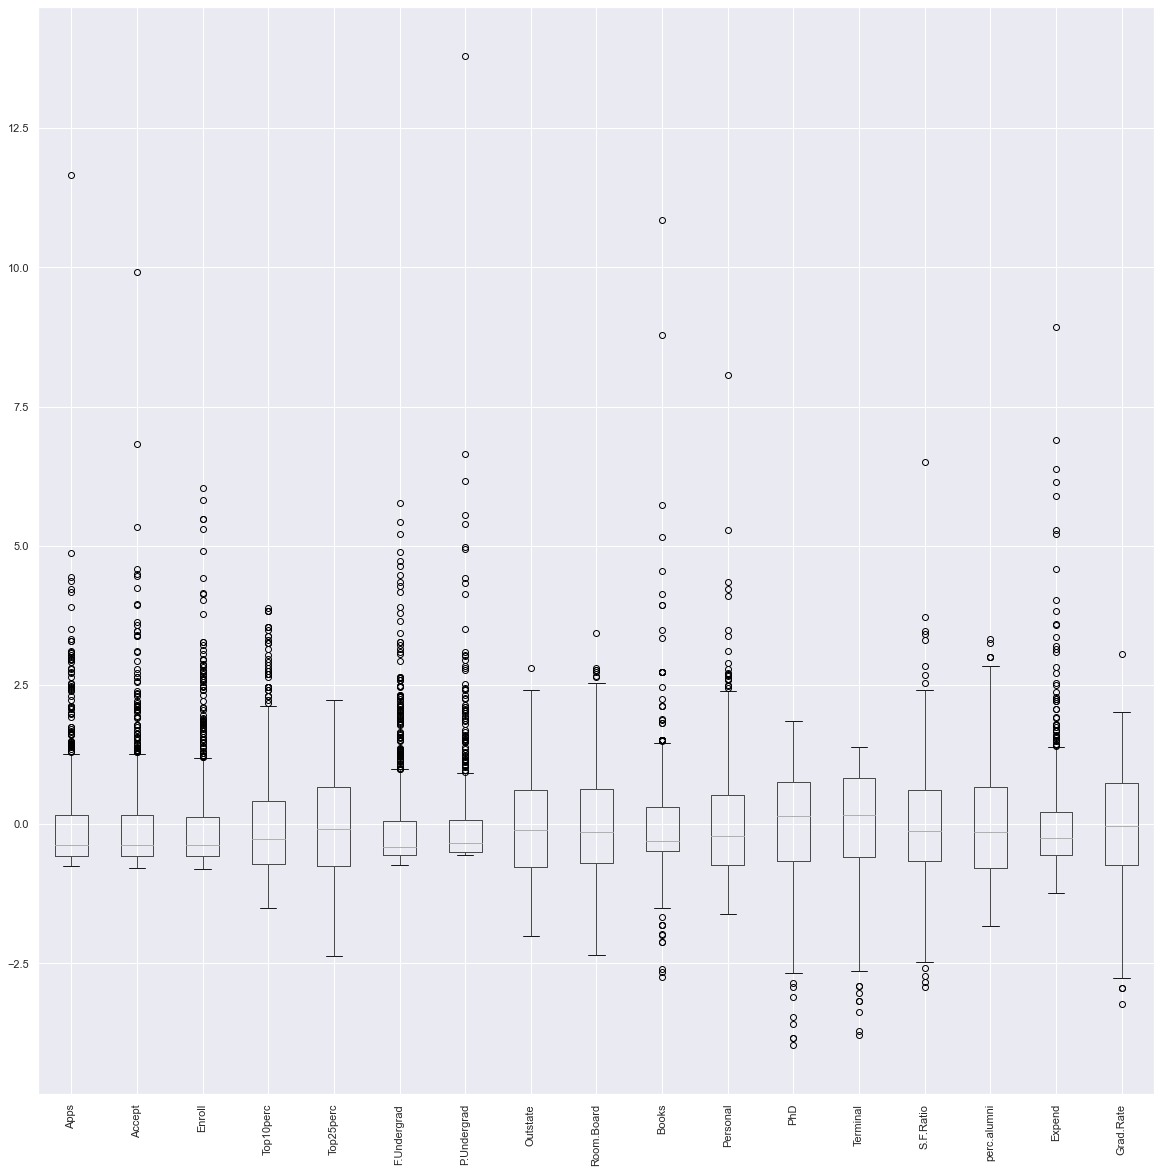

In [10]:
df_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

* The outliers are present in both before and after scaling of the dataset 
* The Reason is scaling does not remove outliers, scaling scales the values on a Z-score distribution. We can use any one method to remove outliers for further processes. 
* The Scaled data after applying Z score scaling clearly shows that mean is now tending towards zero and standard deviation is tending towards 1.
* The scaled boxplots are more aligned together with means of all the variable tending towards zero.


### 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

### Statistical tests to be done before PCA


#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

* H0: All variables in the data are uncorrelated
* Ha: At least one pair of variables in the data are correlated
If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
p_value

0.0

#### KMO Test
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_scaled)
kmo_model

0.8131251200373522

* Outlier treatment not performed as its mentioned in the FAQ's,so we proceed for PCA without treating outliers

In [11]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_scaled)

In [12]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [15]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

### 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [16]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = df_scaled.columns)

In [17]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

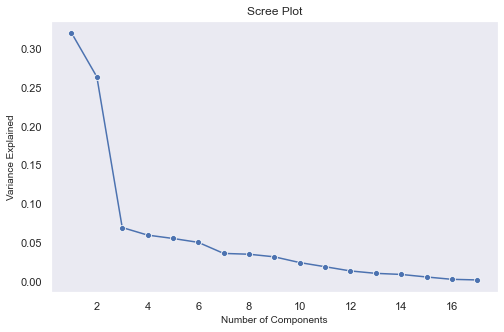

In [26]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,18),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [18]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]
df_selected

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163

### 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [18]:
np.round(df_extracted_loadings['PC1'],2)

Apps           0.25
Accept         0.21
Enroll         0.18
Top10perc      0.35
Top25perc      0.34
F.Undergrad    0.15
P.Undergrad    0.03
Outstate       0.29
Room.Board     0.25
Books          0.06
Personal      -0.04
PhD            0.32
Terminal       0.32
S.F.Ratio     -0.18
perc.alumni    0.21
Expend         0.32
Grad.Rate      0.25
Name: PC1, dtype: float64

In [19]:
print('The linear equation of PC in terms of eigenvectors and corresponding features: ')
for i in range(0,df_extracted_loadings.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_scaled.columns[i]),end=' + ')

The linear equation of PC in terms of eigenvectors and corresponding features: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

### 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [27]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [28]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [29]:
##Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

* The first components explain 32.02% variance in data 
* The first two components explains 58.36% variance in data 
* The first three components explains 65.26% variance in data 
* The first four components explains 71.18% variance in data 
* The first five components explains 76.67% variance in data
* The first five components explains 81.65% variance in data

* The cumulative proportion upto the k-th principal component is the sum of the proportions of variances upto the 𝑘-th component, i.e. ∑ 𝜆𝑗 𝑘 𝑗=1 . 
* If 𝑘 = 6, cumulative proportion is 81.65%. Although there are 17 observed variables, the first 6 principal components can explain more than 80% of the total variation. Hence it is sufficient to use the first 6 PCs instead of the original 17 variables, thereby reducing the dimensions by almost one third.
* The optimum choice of 𝑘 is subjective. The set of 𝑘 principal components effectively substitute the original 𝑝 variables. General rule of thumb is to choose 𝑘 so as to explain 70% - 90% of the total variance. Often a screeplot is used to determine 𝑘
* In Fig, there is a distinct break at 3. However, 𝑘 cannot be taken to be 3 since the first three  PCs explain only 65.26% of total variance. The PCs must be taken so as to explain between 70% - 90% of the total variance. If 𝑘 = 5, then the first 5 PCs explain 76.67 % of the total variance. One choice of 𝑘 could have been 5. However, we have taken 𝑘 = 6 so that the explained variance is above 80%.

#### Eigen Vector Indicates the following:
* The directions in which our data are dispersed (or spread)
* The eigenvectors (principal components) determine the directions of the new feature space
* They also shows New Dimensions of New Mathematical space
* In the above case study, The eigenvector associated with the largest eigenvalue indicates the direction in which the data has the most variance that is 32.02%. Similarly, the eigenvector associated with the second largest eigenvalue indicates the direction in which the data has the second most variance that is and so on. 



In [30]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [31]:
#Check the selected PCs
df_selected

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163

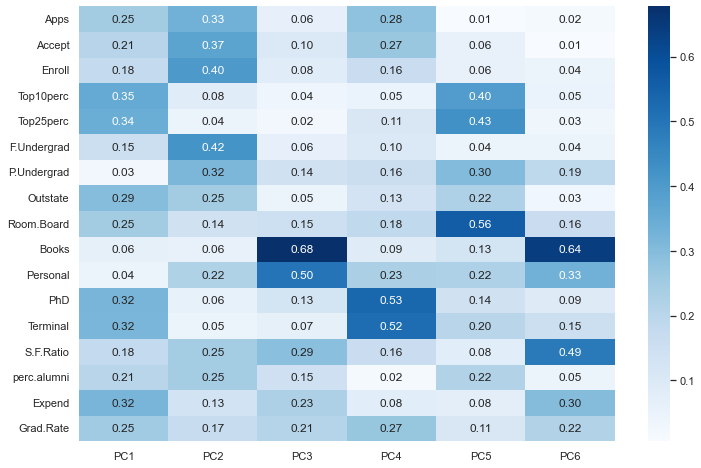

In [32]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [35]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_scaled)

In [36]:
#Just create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668343
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401

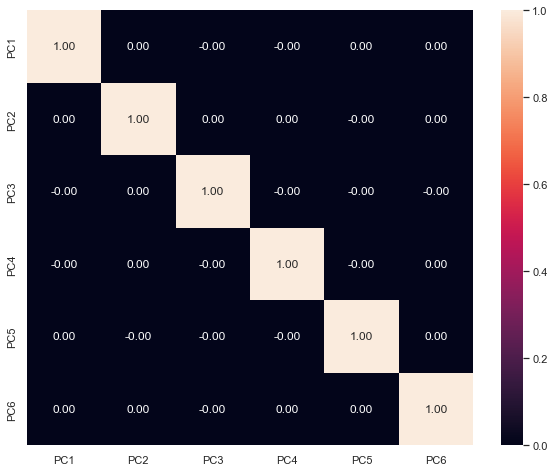

In [37]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

### 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

### The PCA  method Overall has following Business Implication:
* The PCA components for this business case study is 6 where we can understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset by eliminating the dependencies between independent dimensions
* With this analysis we can perform further analysis by capturing the covariance information and supply it the algorithm and model building PCA will improve the efficiency of machine learning models.
* Among the correlations between the PCs and the constituent variables, the following are considerably large
* 1)The first Principal Component can be viewed as measure of variables Top10perc, Top25perc, Terminal and Expend.PC1 explains 32.02% variance in the data.
* 2)The second Principal Component can be viewed as measure of variables Enroll and F.Undergrad. Thus, we may conclude that number of full-time undergraduate student increases as number of enrolment increases. First two PC’s explain 58.36% variance in the data.
* 3)The third Principal Component can be viewed as measure of variables Books and Personal. These two criteria vary together. Thus, Estimated Personal Spending of student increases with increase in Estimated book cost for a student. First three PC’s explains 65.26% variance in the data.
* 4)The fourth Principal Component can be viewed as measure of variables PHD and Terminal. These two criteria vary together. The percentage of faculty with terminal degree increases with percentage of faculty with Phd’s. First four PC’s explains 71.18% variance in the data.
* 5)The fifth Principal Component can be viewed as measure of variables Room.Board. The colleges having high value tend to have high cost of room and board. First five PC’s explain 76.67% variance in the data.
* 6)The sixth principal component is primarily measure of variable book i.e. Estimated book cost for a student. First six PC’s explain 81.65% variance in the data.
* The PCA has significantly reduced the dimensions of the dataset by reducing the unnecessary redundant dimensions
* PCA has also helped in eliminating the dependancies between Independent dimensions
* The captured covariance information can be supplied to the algorithm
* The  Signal to Noise ratio is improved through PCA technique in the following case study.
* Choosing the correct number of principal components is important aspect in data analysis and requires a balancing act. On one side, the aim is to reduce the dimension, so keeping too many principal components will not serve the purpose. However, keeping too few components will cause a large proportion of total variation among the original variables to remain unexplained.
